
## Autoanibodies (Anti-CCP3) for converters 
## Longitudinal time points for CON2 subjects

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(ggsci)
quiet_library(aplot)
quiet_library(cowplot)
quiet_library(DESeq2)
quiet_library(ggrepel)

In [3]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [4]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 5, repr.plot.height = 5)

In [5]:
# reading the master meta data file 
master_meta=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/Figure_input_files/ALTRA_Fig1_Master_meta_bri_Updated
                    .csv")
master_meta%>%head(3)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1


In [6]:
altra_Long<- master_meta %>%
  filter(status %in% c("pre", "conversion"))
altra_Long%>%head(3)
altra_Long%>%dim

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,70,early_RA,conversion,KT00109,2020-10-01,238,SD1003,Female,1984,0,NA,3823,conversion,0,ARI,ARI32,LONG
2,71,early_RA,conversion,KT00790,2021-03-01,204,SD1007,Female,1989,0,NA,110,conversion,0,ARI,ARI33,LONG
3,72,early_RA,conversion,KT02132,2021-06-01,106,CU1015,Male,1945,0,0,752,conversion,0,ARI,ARI34,LONG


[1] 75 17

In [7]:
## filtering the NA value
altra_Long=altra_Long%>% filter(!is.na(anti_ccp3_finalCombined))

In [8]:
#taking log10 in anti_ccp3 levels for plotting 
altra_Long <- altra_Long %>%
  mutate(log10_anti_ccp3_finalCombined = log10(anti_ccp3_finalCombined))
altra_Long%>%head()

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new,log10_anti_ccp3_finalCombined
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,70,early_RA,conversion,KT00109,2020-10-01,238,SD1003,Female,1984,0,NA,3823,conversion,0,ARI,ARI32,LONG,3.582404
2,71,early_RA,conversion,KT00790,2021-03-01,204,SD1007,Female,1989,0,NA,110,conversion,0,ARI,ARI33,LONG,2.041393
3,72,early_RA,conversion,KT02132,2021-06-01,106,CU1015,Male,1945,0,0,752,conversion,0,ARI,ARI34,LONG,2.876218
4,73,early_RA,conversion,KT02135,2021-06-01,615,CU1003,Female,1998,0,0,613,conversion,0,ARI,ARI35,LONG,2.787460
5,74,early_RA,conversion,KT02820,2021-11-01,714,CU1009,Female,1963,0,NA,58,conversion,0,ARI,ARI36,LONG,1.763428
6,75,early_RA,conversion,KT02844,2021-10-01,614,CU1029,Female,1955,0,0,32,conversion,0,ARI,ARI37,LONG,1.505150


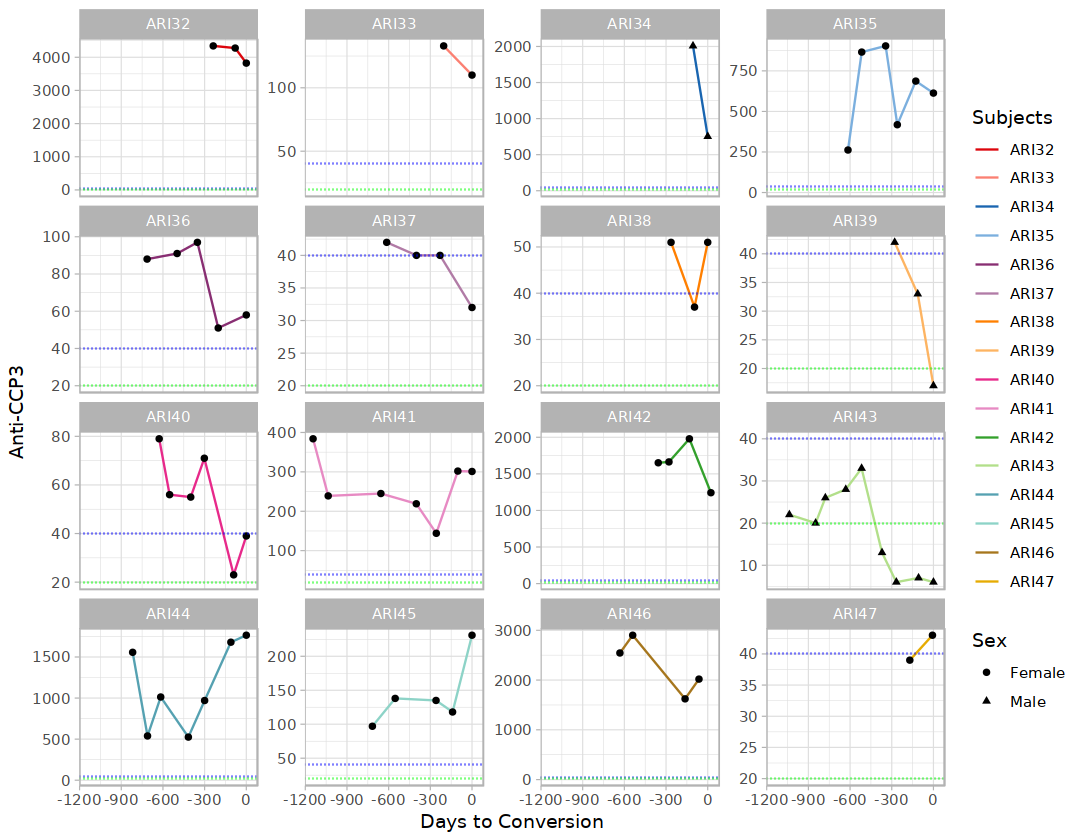

In [9]:
options(repr.plot.width =9, repr.plot.height = 7)
#Filter out 'ARI46' from 's1_ids' column
filtered_altra_Long <- altra_Long %>%
  filter(sample.sampleKitGuid != "KT00208") ##Mark suggestion to remove the data point 
plot_facetv2 <- filtered_altra_Long %>%  
  ggplot(aes(x = days_to_conversion, y = anti_ccp3_finalCombined)) +
  geom_line(aes(color = s1_ids)) + 
  geom_point(aes(shape = subject.biologicalSex)) + 
  geom_hline(yintercept = 40, linetype = "dotted", color = "blue")+
  geom_hline(yintercept =20, linetype = "dotted", color = "green")+
  facet_wrap(vars(s1_ids),ncol=4,scales = "free_y") + 
  scale_color_manual(values = cluster_colors,name = "Subjects") +
  scale_shape_manual(name = "Sex", values = c(16, 17)) +
  #scale_x_continuous(limits = c(-1000, 500)) +  # Set x-axis limits and breaks
  #scale_y_continuous(limits = c(0, 5000), breaks = seq(0, 4000, by = 1000)) +
 theme_light()+  # Set y-axis limits and breaks
  #geom_hline(yintercept = 50, linetype = "dotted", color = "blue") +  # Add dotted line at y = 50
  #geom_vline(xintercept = 0, linetype = "dotted", color = "red")   # Add dotted line at x = 0
  labs(
    x = "Days to Conversion",  # Customize x-axis label
    y = "Anti-CCP3"     # Customize y-axis label
  )
 
plot_facetv2

In [11]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_S3_A.pdf", plot = plot_facetv2, width = 7, height = 7, units = "in")

## S3 CON2 Longitudinal Time points

In [12]:
master_meta%>%head(3)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1


In [13]:
kable(table(master_meta$Status_Xsec))



|Var1          | Freq|
|:-------------|----:|
|ALTRA_healthy |   38|
|at_risk       |   45|
|BRI           |   86|
|early_RA      |   28|

In [14]:
bri_filt=master_meta%>%filter(Status_Xsec=="BRI")
bri_filt%>%dim
bri_filt%>%head(3)

[1] 86 17

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,158,BRI,BRI,KT00003,2019-10-01T00:00:00Z,0,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON201,CON2
2,159,BRI,BRI,KT00035,2020-01-01T00:00:00Z,83,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON201,CON2
3,160,BRI,BRI,KT00355,2020-09-01T00:00:00Z,337,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON201,CON2


In [15]:
bri_filt$s1_ids <- str_replace(bri_filt$s1_ids, "(CON\\d)(\\d{2})", "\\1-\\2")
bri_filt%>%dim
bri_filt%>%head(3)

[1] 86 17

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,158,BRI,BRI,KT00003,2019-10-01T00:00:00Z,0,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON2-01,CON2
2,159,BRI,BRI,KT00035,2020-01-01T00:00:00Z,83,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON2-01,CON2
3,160,BRI,BRI,KT00355,2020-09-01T00:00:00Z,337,BR1003,Female,1989,NA,NA,NA,BRI_Healthy,-2000,CON2,CON2-01,CON2


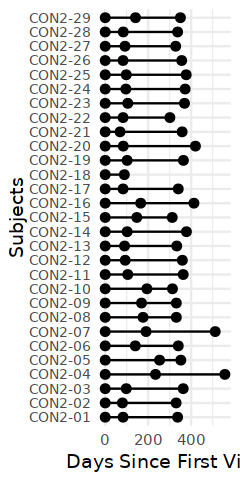

In [25]:
options(repr.plot.width =2, repr.plot.height = 4)
pal=c("black")
pl=ggplot(bri_filt, aes(x = sample.daysSinceFirstVisit, y = s1_ids, group = subject.subjectGuid)) +
  geom_line() +
  geom_point(aes(color = status), size = 2) +
  #scale_x_continuous(breaks = seq(0, 1700, by = 250)) +  # Set custom breaks for x-axis
  theme_minimal() +
  labs(x = "Days Since First Visit", y = "Subjects") +
  theme(axis.text.y = element_text(size = 8)) +
  scale_color_manual(values = pal)+
  theme(legend.position = "none")  # Remove the legend

pl

In [26]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_S3_C.pdf", plot = pl, width = 2, height = 4, units = "in")

In [19]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.5               DESeq2_1.40.2              
 [3] cowplot_1.1.3               aplot_0.2.3                
 [5] ggsci_3.2.0                 plotly_4.10.4              
 [7] knitr_1.47                  ggpubr_0.6.0               
 [9] SeuratDisk_0.0.0.9021       Single